# TP 2 : Linear regression (SD-TSIA204)

For this lab, you have to upload a single ipynb file. Please use the following script to format your filename (bad name will lead to a 1 point penalty):

```
# Change here using YOUR own FIRST and last names
fn1 = "john"
ln1 = "smith"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
```
You have to upload it on eCampus. The deadline is the 31/01/2024 at 23h59 in eCampus. Out of 20 points, 5 are specifically dedicated to:
- Presentation quality: writing, clarity, no typos, visual efforts for graphs, titles, legend, colorblindness, etc. (2 points).
- Coding quality: indentation, PEP8 Style, readability, adapted comments, brevity (2 points)
- No bug on the grader’s machine (1 point)

### Beware:
1) Labs submitted late, by email or uploaded in a wrong group folder will be graded 0/20.
2) The package statsmodel in NOT allowed.
3) For certain questions, answers must be accompanied by explanations. An answer without an explanation will be graded as 0.

- Note: you can use https://github.com/agrmf/check_notebook to check your notebook is fine, and also use https://github.com/kenkoooo/jupyter-autopep8 to enforce pep8 style.


## Processing the data

1. For the first question, we load a standart dataset from sklearn.datasets named fetch_california_housing. This dataset has only p = 8 variables.

In [1]:
# Importing libraries ---------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Importing the dataset -------------------------------------------------------
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

# Dataset size 
data_size = len(dataset.data)
print('Dataset size: ', data_size)

# Adding the intercept term
X = np.c_[np.ones((data_size, 1)), dataset.data]

# Splitting the dataset into the Training set and Test set --------------------
from sklearn.model_selection import train_test_split

# Random state = 0 implies that the split will always be the same
# Random state = None implies that the split will always be different
# Random state = any other number implies that the split will be random but the same for a given number
X_train, X_test, y_train, y_test = train_test_split(X, dataset.target, test_size = 0.2, random_state = 7)


Dataset size:  20640


In [2]:
# Estimating the parameters ----------------------------------------------------
# Calculating the parameters for the training set
XtX_train = np.dot(X_train.T, X_train)
Xty_train = np.dot(X_train.T, y_train)
beta_train = np.dot(np.linalg.inv(XtX_train), Xty_train)

# Calculating the parameters for the testing set
XtX_test = np.dot(X_test.T, X_test)
Xty_test = np.dot(X_test.T, y_test)
beta_test = np.dot(np.linalg.inv(XtX_test), Xty_test)

# Computing the solutions -------------------------------------------------------
# Computing the solution for the training set
y_hat_train = np.dot(X_train, beta_train)

# Computing the solution for the testing set
y_hat_test = np.dot(X_test, beta_test)

In [3]:
# MSE Function
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

# R2 Function
def r2(y, y_hat):
    return 1 - mse(y, y_hat) / np.var(y)

In [4]:
# Comparing the training set with the sklearn library -------------------------
print('Training set: --------------------------')

# From the functions declared above
print('MSE function: ', mse(y_train, y_hat_train))
print('R2 function: ', r2(y_train, y_hat_train))

# From the sklearn library
print('MSE sklearn: ', mse(y_train, y_hat_train))
print('R2 sklearn: ', r2(y_train, y_hat_train))

# Difference between the two methods
print('MSE difference: ', mse(y_train, y_hat_train) - mse(y_train, y_hat_train))
print('R2 difference: ', r2(y_train, y_hat_train) - r2(y_train, y_hat_train))

Training set: --------------------------
MSE function:  0.5237739722635567
R2 function:  0.605509337944799
MSE sklearn:  0.5237739722635567
R2 sklearn:  0.605509337944799
MSE difference:  0.0
R2 difference:  0.0


In [5]:
# Comparing the test set with the sklearn library -----------------------------

# From the functions declared above
print('MSE function: ', mse(y_test, y_hat_test))
print('R2 function: ', r2(y_test, y_hat_test))

# From the sklearn library
print('MSE sklearn: ', mse(y_test, y_hat_test))
print('R2 sklearn: ', r2(y_test, y_hat_test))

# Difference between the two methods
print('MSE difference: ', mse(y_test, y_hat_test) - mse(y_test, y_hat_test))
print('R2 difference: ', r2(y_test, y_hat_test) - r2(y_test, y_hat_test))

MSE function:  0.5186803953017145
R2 function:  0.6143687469995657
MSE sklearn:  0.5186803953017145
R2 sklearn:  0.6143687469995657
MSE difference:  0.0
R2 difference:  0.0


Confidence interval: 
[[-3.83939503e+01 -3.50255003e+01]
 [ 4.22033193e-01  4.43413859e-01]
 [ 7.98086643e-03  1.02745282e-02]
 [-1.14825947e-01 -8.50003328e-02]
 [ 5.19669877e-01  6.60750738e-01]
 [-1.64242236e-05  7.75788619e-06]
 [-6.71872000e-03 -2.66424538e-03]
 [-4.36942719e-01 -4.00153687e-01]
 [-4.51369975e-01 -4.12870982e-01]]


Text(0.5, 1.0, 'Histogram of residuals')

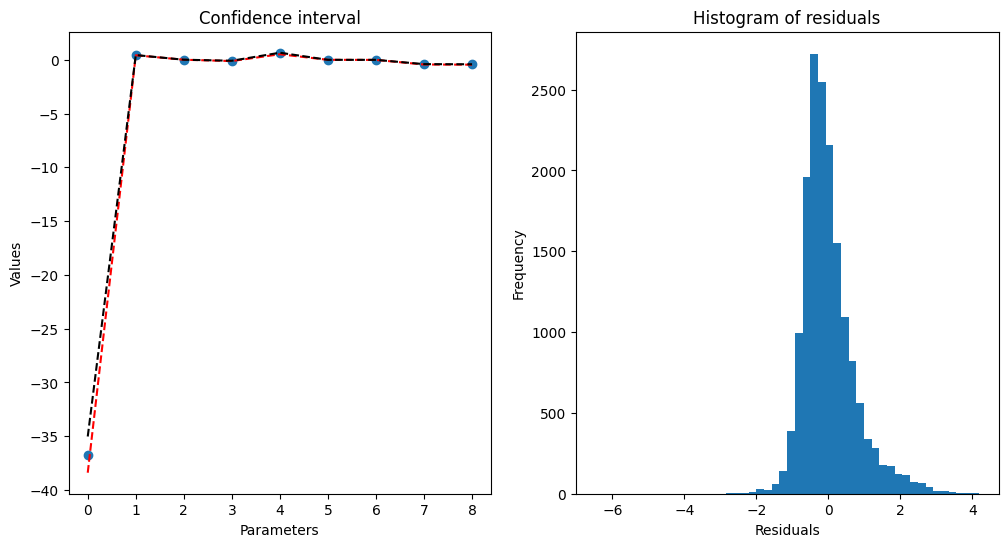

In [6]:
# Confidence interval at level alpha = 0.01 (99% confidence) ------------------
# Calculating the standard error
sigma2 = np.sum((y_train - y_hat_train)**2) / (data_size - 2)
sigma = np.sqrt(sigma2)
XtX_inv = np.linalg.inv(XtX_train)
se = np.sqrt(np.diag(sigma2 * XtX_inv))

# Calculating the t-statistic
from scipy.stats import t
t_stat = t.ppf(1 - 0.005, data_size - 2)

# Calculating the confidence interval
ci = np.c_[beta_train - t_stat * se, beta_train + t_stat * se]

# Printing the confidence interval
print('Confidence interval: ')
print(ci)

# Plotting the confidence interval and the histogram of residuals in a 1x2 grid --
# Confidence interval
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(beta_train, 'o')
plt.plot(ci[:, 0], 'r--')
plt.plot(ci[:, 1], 'k--')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.title('Confidence interval')

# Histogram of residuals
plt.subplot(122)
plt.hist(y_train - y_hat_train, bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')


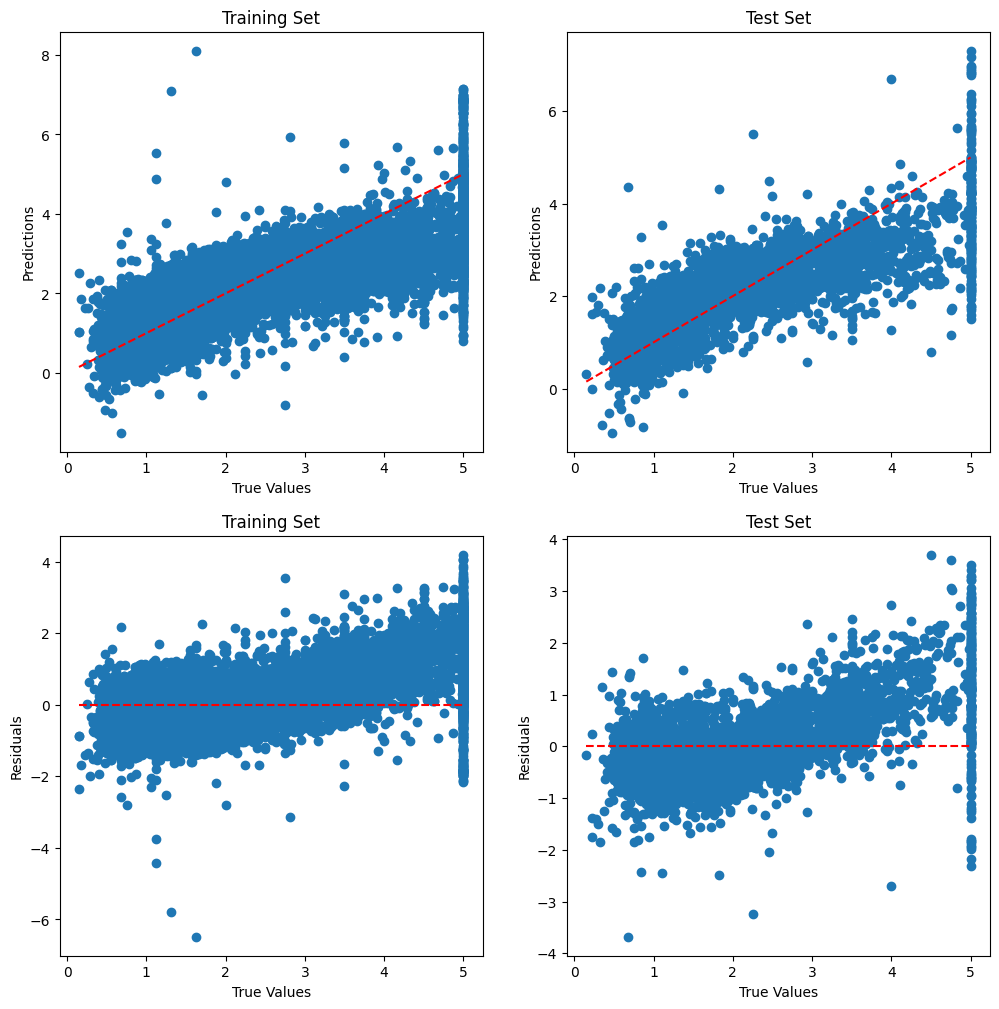

In [7]:
plt.figure(figsize=(12, 12))

# Plotting the training set
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_hat_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Training Set')

# Plotting the test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_hat_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Test Set')

# Plotting the residuals for the training set
plt.subplot(2, 2, 3)
plt.scatter(y_train, y_train - y_hat_train)
plt.plot([min(y_train), max(y_train)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Training Set')

# Plotting the residuals for the test set
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test - y_hat_test)
plt.plot([min(y_test), max(y_test)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Test Set')

plt.show()

2. For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data.

In [9]:
# Separating the data again ----------------------------------------------------
from sklearn.model_selection import train_test_split

# Random state = 0 implies that the split will always be the same
# Random state = None implies that the split will always be different
# Random state = any other number implies that the split will be random but the same for a given number
X_train, X_test, y_train, y_test = train_test_split(X, dataset.target, test_size = 0.25, random_state = 0)

# Estanrdizing the data (mean = 0, variance = 1) ------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'Test Set')

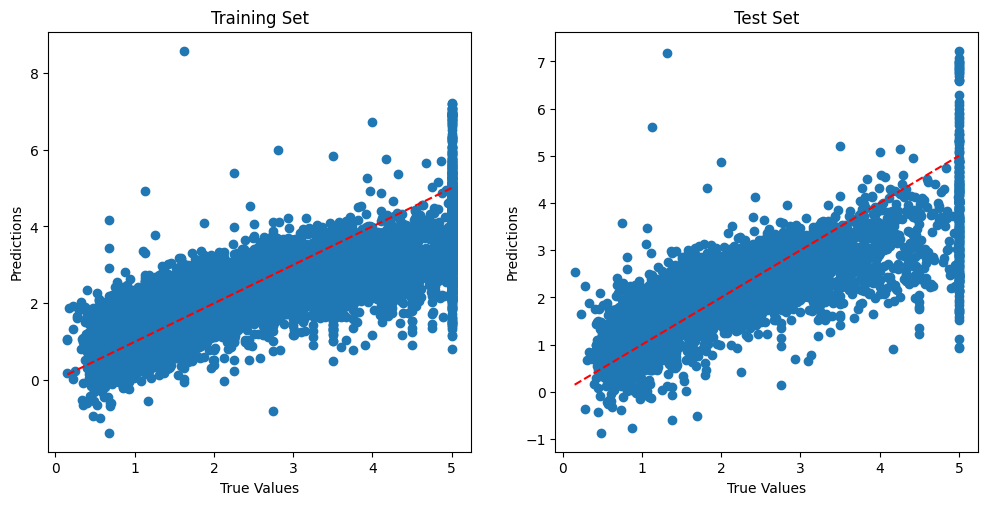

In [11]:
# Fitting a regular OLS model --------------------------------------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Ploting the results ----------------------------------------------------------
plt.figure(figsize=(12, 12))

# Plotting the training set
plt.subplot(2, 2, 1)
plt.scatter(y_train, regressor.predict(X_train))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Training Set')

# Plotting the test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, regressor.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Test Set')


## Variable Selection

3. Program the method of foward variable selection based on the hypothesis test for regression coefficient. This method starts from an empty set of variables $S$ and at each iteration selects one variable relevant for predicting $y$ and includes it in the set $S$. It runs until a halting condition is met. 

In [ ]:
# Function that return the smallest p-value ------------------------------------